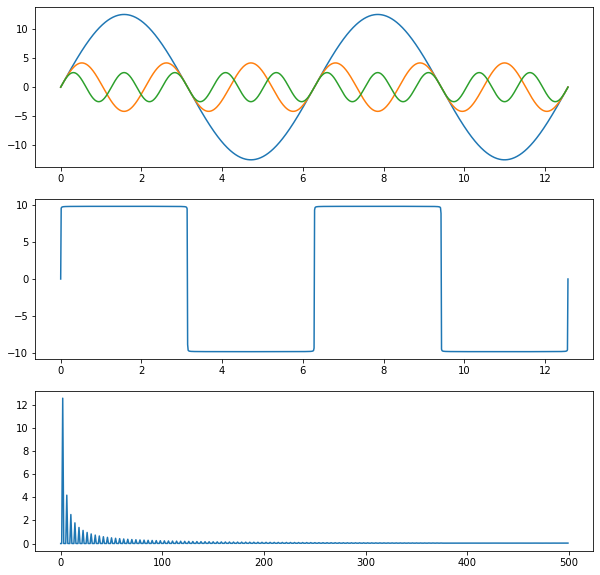

In [1]:
#方波
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
 
x = np.linspace(0,np.pi*4,1000)
f1 = 4*np.pi*np.sin(x)
f2 = 4/3*np.pi*np.sin(3*x)
f3= 4/5*np.pi*np.sin(5*x)

n = 1000
f = np.zeros(n)
for i in range(1,n+1):
    f += 4/(2*i-1)*np.pi*np.sin((2*i-1)*x)

N=1000
Fs=1000
freq = np.arange(N) / N * Fs

Y = np.fft.fft(f)/(N/2)

Y[0] = Y[0] / 2
freq_half = freq[range(int(N/2))]
Y_half = Y[range(int(N/2))]
fig,ax= plt.subplots(3, 1, figsize=(10, 10))
ax[0].plot(x,f1)
ax[0].plot(x,f2)
ax[0].plot(x,f3)
ax[1].plot(x,f)
ax[2].plot(freq_half, abs(Y_half))

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft 
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False 
%matplotlib inline 

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

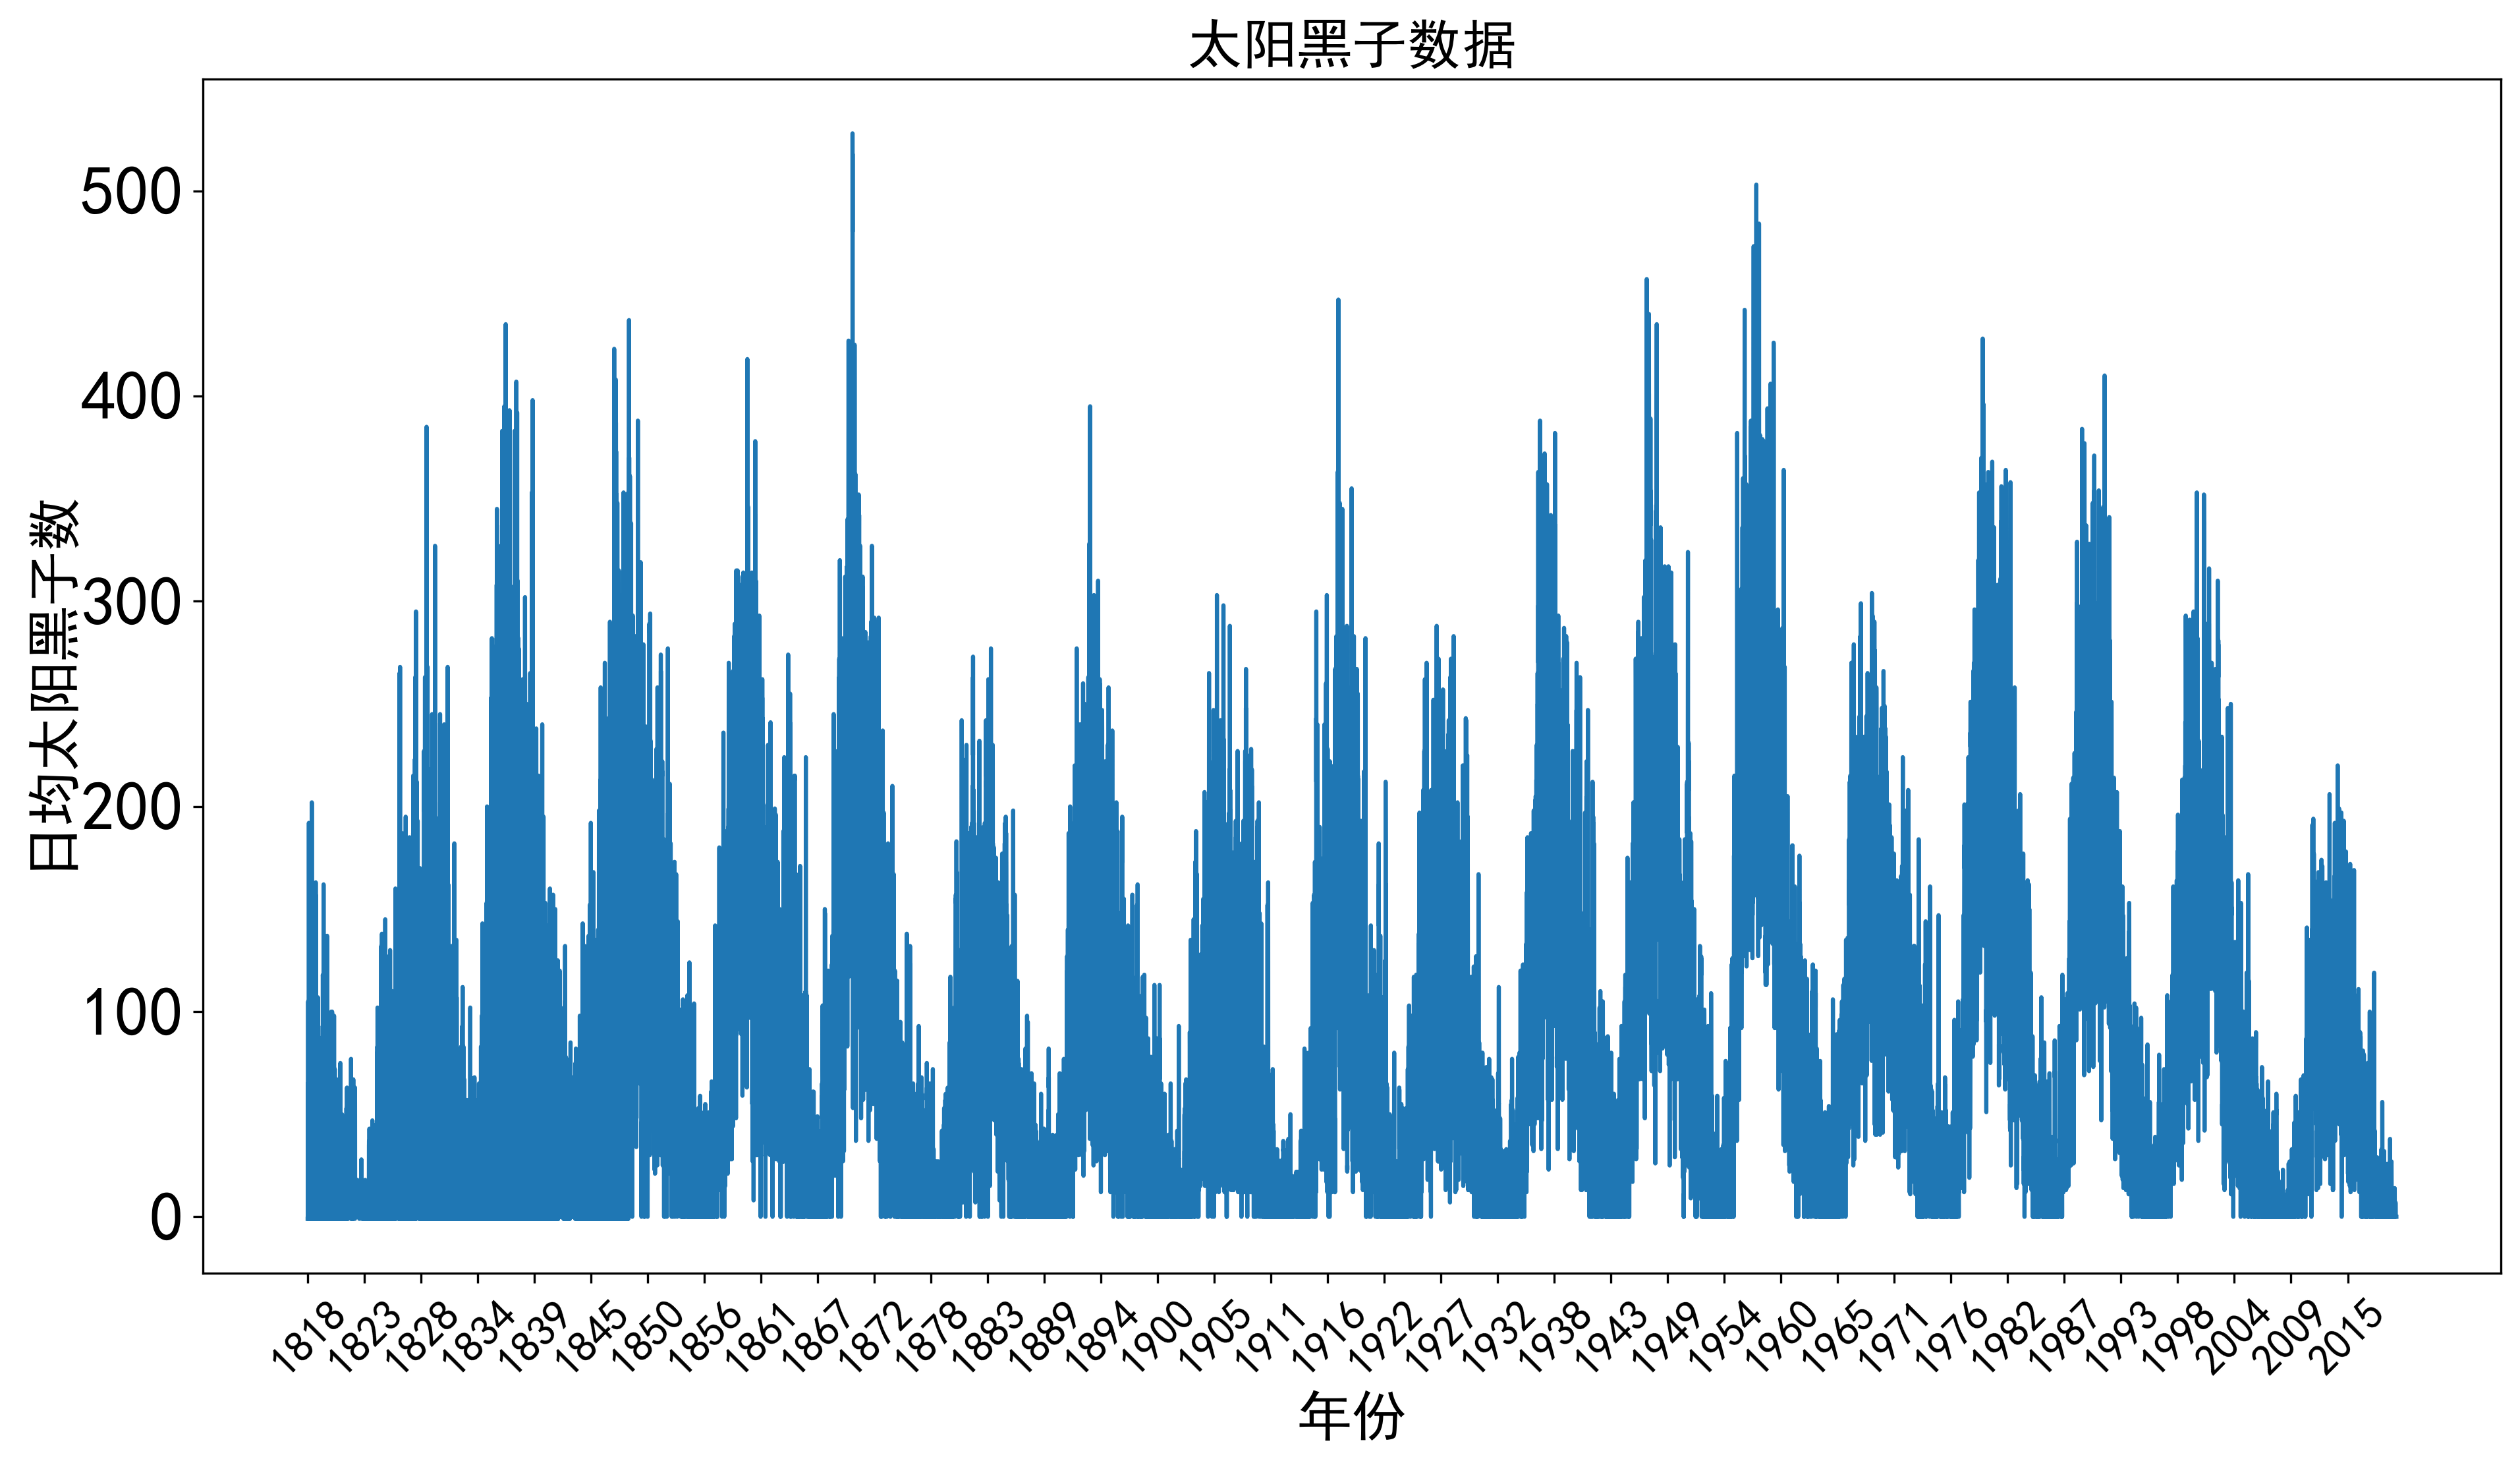

In [4]:
#每天sunspot统计
data = np.loadtxt('/Users/张艳眉/work/week-7-main/sunspot_data.csv',skiprows=1,delimiter=',')
day = np.arange(1,len(data[:,4])+1,1) 
sunspot = data[:,5]
plt.figure(figsize=(15,8),dpi=300)
plt.plot(day,sunspot)

plt.xlabel('年份',fontsize=20)
plt.ylabel('日均太阳黑子数',fontsize=20)
plt.title('太阳黑子数据',fontsize=20)

#把x坐标转化为年份
x_year = []
for i in range(0,len(day),2000): 
    x_year.append(int(data[i,4]))
plt.xticks(range(0,len(day),2000),x_year,rotation=45,fontsize=16)
plt.yticks(fontsize=25)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

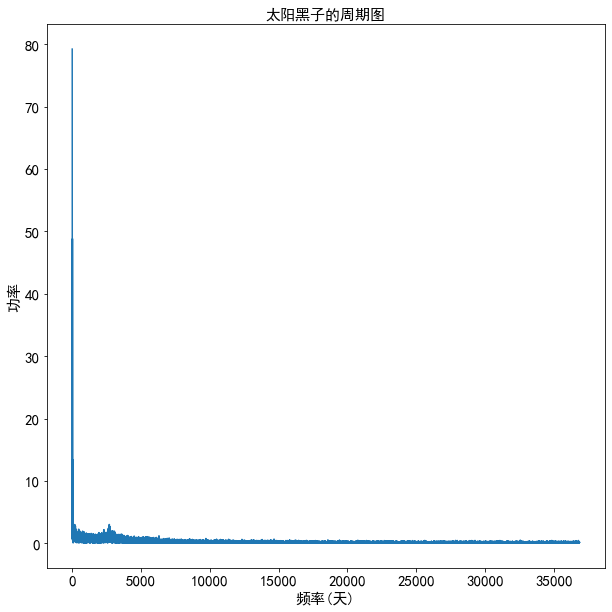

In [7]:
N=len(day)
Fs=len(day)

freq = np.arange(N) / N * Fs

Y = np.fft.fft(sunspot)/(N/2)

Y[0] = Y[0] / 2
freq_half = freq[range(int(N/2))]
Y_half = Y[range(int(N/2))]

fig,ax= plt.subplots(1, 1, figsize=(10, 10))
power=abs(Y_half)
ax.plot(freq_half, power)

#freq_index = np.argmax(power)           #power最大时，freq的索引
#freq_half_max = freq_half[freq_index]      #power最大时，period的值，freq_index
#plt.plot(freq_half_max-5,power[freq_index],'ro')
#plt.text(freq_half_max,power[freq_index],'周期 = %.2f 天' %(freq_half_max),fontsize=16) 

plt.title('太阳黑子的周期图',fontsize=15)
plt.xlabel('频率(天)',fontsize=15)
plt.ylabel('功率',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)